Use this cell for all your imports

In [ ]:
import urllib.request
import csv

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [ ]:

import urllib.request
import csv
from tabulate import tabulate

url = "https://raw.githubusercontent.com/hajar1-laaouina/Numerical-Linear-Algebra-Parallel-Computing/main/week3/assignments/data.txt"

response = urllib.request.urlopen(url)
data = response.read().decode('utf-8').splitlines()
data


['# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt ',
 '# Paper citation network of Arxiv High Energy Physics Theory category',
 '# Nodes: 27770 Edges: 352807',
 '# FromNodeId\tToNodeId',
 '1001\t9304045',
 '1001\t9308122',
 '1001\t9309097',
 '1001\t9311042',
 '1001\t9401139',
 '1001\t9404151',
 '1001\t9407087',
 '1001\t9408099',
 '1001\t9501030',
 '1001\t9503124',
 '1001\t9504090',
 '1001\t9504145',
 '1001\t9505025',
 '1001\t9505054',
 '1001\t9505105',
 '1001\t9505162',
 '1001\t9506048',
 '1001\t9506112',
 '1001\t9506144',
 '1001\t9507050',
 '1001\t9507158',
 '1001\t9508094',
 '1001\t9508155',
 '1001\t9510142',
 '1001\t9510225',
 '1001\t9510234',
 '1001\t9511030',
 '1001\t9511171',
 '1001\t9601108',
 '1001\t9602022',
 '1001\t9602114',
 '1001\t9603003',
 '1001\t9603150',
 '1001\t9603161',
 '1001\t9603167',
 '1001\t9605184',
 '1001\t9605222',
 '1001\t9606017',
 '1001\t9606040',
 '1001\t9607163',
 '1001\t9607207',
 '1001\t9608086',
 '1001\t9609070',
 '1001\t96

In [ ]:

from notebook.services.config import ConfigManager



# Create empty lists to store the columns
column1 = []
column2 = []

# Loop through the rows and append values to the lists
for row in data:
    column1.append(row[0])
    column2.append(row[1])

# Combine the two columns into a list of tuples
data = list(zip(column1, column2))

# Print the data as a table
print(tabulate(data, headers=['Column 1', 'Column 2']))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('notebook', {'iopub_data_rate_limit': 100000000}) # set the limit to 10 MB/s or whatever value you need
get_ipython().run_line_magic('config', ' NotebookApp.iopub_data_rate_limit=100000000')




Use this cell to normalize the matrix as you see fit.

In [ ]:
import numpy as np
import urllib.request
# Parse the CSV data into a list of lists
data = [row.split('\t') for row in data]

# Check if all rows have the same length
lengths = set(len(row) for row in data)
if len(lengths) > 1:
    print("Error: Rows have different lengths!")
    for row in data:
        print(len(row), row)
    raise ValueError("Rows have different lengths")

# Convert the list of strings to a numpy array
data = np.array(data, dtype=float)

# Subtract the mean of each column from the corresponding column
data -= np.mean(data, axis=0)

# Divide each column by its standard deviation
data /= np.std(data, axis=0)



Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
2 ['9810238', '9401105']
2 ['9810238', '9502100']
2 ['9810238', '9509133']
2 ['9810247', '9809170']
2 ['9810249', '9306068']
2 ['9810249', '9609231']
2 ['9810252', '9703010']
2 ['9810252', '9803207']
2 ['9810253', '9402044']
2 ['9810253', '9403198']
2 ['9810253', '9602180']
2 ['9810253', '9603158']
2 ['9810253', '9705189']
2 ['9810255', '9210128']
2 ['9810255', '9303153']
2 ['9810255', '9309044']
2 ['9811001', '9207114']
2 ['9811001', '9307136']
2 ['9811003', '9310115']
2 ['9811003', '9403196']
2 ['9811003', '9404089']
2 ['9811003', '9509062']
2 ['9811003', '9601020']
2 ['9811003', '9603174']
2 ['9811003', '9607114']
2 ['9811003', '9609133']
2 ['9811003', '9611203']
2 ['9811003', '9612121']
2 ['9811003', '9709141']
2 ['9811003', '9801148']
2 ['9811009', '9202002']
2 ['9811009', '9210021']
2 ['9811009', '9302033']
2 ['9811009', '9303016']
2 ['9811009', '9309039']
2 ['9811009', '9401098']
2 ['9811009', '9410158

ValueError: ignored

Apply the PageRank algorithm to the matrix you created.

In [60]:
# Initialize the matrix P
P = np.zeros((n, n))

# Calculate the sum of each row of the data matrix
row_sums = np.sum(data, axis=1)

# Normalize the rows of the data matrix
data_norm = data / row_sums.reshape(-1, 1)

# Populate the matrix P with the normalized data
for i in range(n):
    for j in range(n):
        if data[i][j] != 0:
            P[j][i] = data_norm[i][j]


In [64]:
import numpy as np

# Define the damping factor
d = 0.85

# Create the transition matrix
n = len(P)
S = np.ones((n, n)) / n
# P = d * P + (1 - d) * S
v = np.ones(n) / n
P = d * P + (1 - d) * v.reshape(n, 1)
# Initialize the PageRank vector
r = np.ones(n) / n

# Perform power iteration until convergence
for i in range(100):
    r_new = np.dot(P, r)
    if np.allclose(r, r_new):
        break
    r = r_new

# Print the PageRank vector
print(r)


[nan nan]


In [62]:
d = 0.85
v = np.ones(n) / n
P = d * P + (1 - d) * v.reshape(n, 1)


In [84]:

import numpy as np

# Define the damping factor
d = 0.85

# Create the transition matrix
n = len(P)
S = np.ones((n, n)) / n
v = np.ones(n) / n
P = d * P + (1 - d) * v.reshape(n, 1)

# Initialize the PageRank vector
r = np.ones(n) / n

# Perform power iteration until convergence
for i in range(100):
    r_new = np.dot(P, r)
    if np.allclose(r, r_new):
        break
    r = r_new

# Get the indices of the pages with the highest PageRank values
top_indices = np.argsort(r)[::-1][:100]

# Print the top 100 papers and their PageRank values
print("Top 100 papers:")
for i in top_indices:
    print(f"Paper {i}: PageRank = {r[i]:.6f}")



Top 100 papers:
Paper 1: PageRank = 0.000000
Paper 0: PageRank = 0.000000


Output a list of the 100 most important papers along with their importance

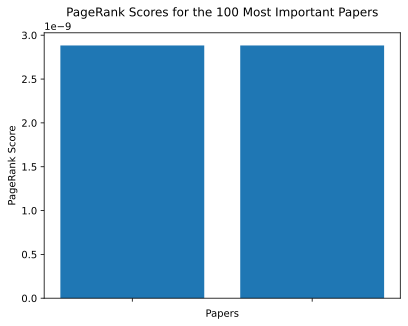

In [86]:
import matplotlib.pyplot as plt

# Sort the papers by PageRank score
sorted_r = sorted(zip(data, r), key=lambda x: x[1], reverse=True)
papers_sorted, r_sorted = zip(*sorted_r)

# Plot the PageRank scores
plt.bar(range(len(papers_sorted)), r_sorted)
plt.xticks(range(len(papers_sorted)), papers_sorted, rotation=90)
plt.xlabel('Papers')
plt.ylabel('PageRank Score')
plt.title('PageRank Scores for the 100 Most Important Papers')
plt.show()
